# Introduction to Neural Signal Processing
*Written by Luke Chang*

In this lab, we will cover the basics of convolution, sine waves, and fourier transforms. This lab is largely based on exercises from Mike X Cohen's excellent book, [Analying Neural Data Analysis: Theory and Practice](https://www.amazon.com/Analyzing-Neural-Time-Data-Practice/dp/0262019876). If you are interested in learning in more detail about the basics of EEG and time-series analyses I highly recommend his accessible introduction. I also encourage you to watch his accompanying freely available [*lecturelets*](http://mikexcohen.com/lectures.html) to learn more about each topic introduced in this notebook.

# Time Domain

First we will work on signals in the time domain.  This requires measuring a signal at a constant interval over time.  The frequency with which we measure a signal is referred to as the sampling frequency.  The units of this are typically described in $Hz$ - or the number of cycles per second. It is critical that the sampling frequency is consistent over the entire measurement of the time series.

## Dot Product
To understand convolution, we first need to familiarize ourselves with the dot product.  The dot product is simply the sum of the elements of a vector weighted by the elements of another vector. This method is commonly used in signal processing, and also in statistics as a measure of similarity between two vectors. Finally, there is also a geometric inrepretation which is a mapping between vectors (i.e., the product of the magnitudes of the two vectors scaled by the cosine of the angle between them). For a more in depth overview of the dot product and its relation to convolution, you can watch this optional [video](https://youtu.be/rea6M1oagmA).

$dotproduct_{ab}=\sum\limits_{i=1}^n a_i b_i$

Let's create some vectors of random numbers and see how the dot product works.  First, the two vectos need to be of the same length.

Dot Product: 555


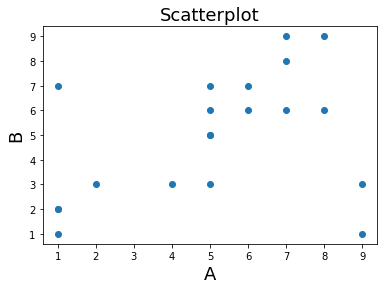

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

a = np.random.randint(1,10,20)
b = np.random.randint(1,10,20)

plt.scatter(a,b)
plt.ylabel('B', fontsize=18)
plt.xlabel('A', fontsize=18)
plt.title('Scatterplot', fontsize=18)

print('Dot Product: %s' % np.dot(a,b))

what happens when we make the two variables more similar?  In the next example we add gaussian noise on top of one of the vectors.  What happens to the dot product?

Dot Product: 691.6516900344186


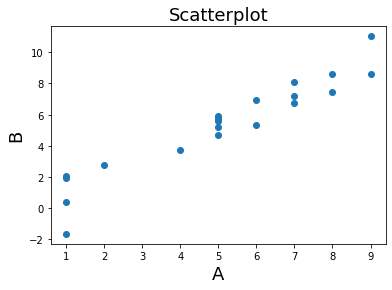

In [2]:
b = a + np.random.randn(20)
plt.scatter(a,b)
plt.ylabel('B', fontsize=18)
plt.xlabel('A', fontsize=18)
plt.title('Scatterplot', fontsize=18)

print(f'Dot Product: {np.dot(a,b)}')

## Convolution
Convolution in the time domain is an extension of the dot product in which the dot product is computed iteratively over time.  One way to think about it is that one signal weights each time point of the other signal and then slides forward over time.  Let's call the timeseries variable *signal* and the other vector the *kernel*. Importantly, for our purposes, the kernel will almost always be smaller than the signal, otherwise we would only have one scalar value afterwards.

To gain an intuition of how convolution works, let's play with some data. First, let's create a time series of spikes. Then let's convolve this signal with a boxcar kernel.

Text(0.5, 1.0, 'Kernel ')

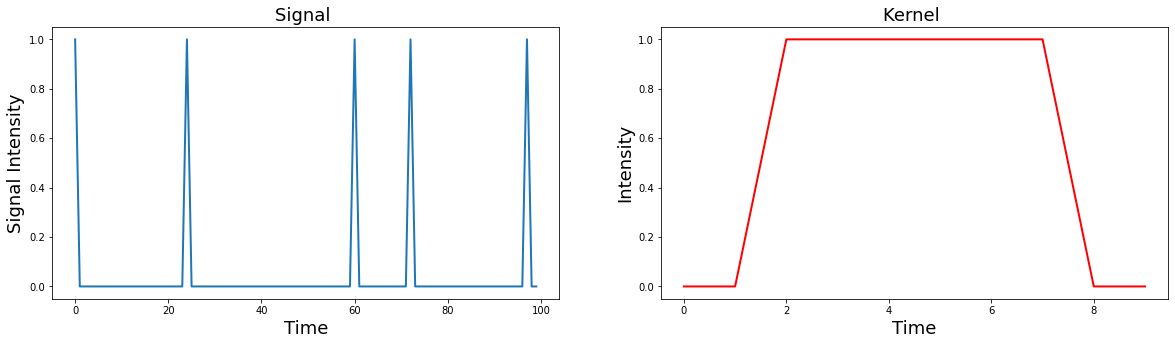

In [3]:
n_samples = 100

signal = np.zeros(n_samples)
signal[np.random.randint(0 ,n_samples, 5)] = 1

kernel = np.zeros(10)
kernel[2:8] = 1

f,a = plt.subplots(ncols=2, figsize=(20,5))
a[0].plot(signal, linewidth=2)
a[0].set_xlabel('Time', fontsize=18)
a[0].set_ylabel('Signal Intensity', fontsize=18)
a[0].set_title('Signal ', fontsize=18)
a[1].plot(kernel, linewidth=2, color='red')
a[1].set_xlabel('Time', fontsize=18)
a[1].set_ylabel('Intensity', fontsize=18)
a[1].set_title('Kernel ', fontsize=18)


Notice how the kernel is only 10 samples long and the boxcar width is about 6 seconds, while the signal is 100 samples long with 5 single pulses.

Now let's convolve the signal with the kernel by taking the dot product of the kernel with each time point of the signal. This can be illustrated by creating a matrix of the kernel shifted each time point of the signal.

We will illustrate using a heatmap, where the change in the color reflects the intensity, that this is simply moving the boxcar kernel, which is 6 seconds in duration forward in time for each sample.

Text(0.5, 1.0, 'Time Shifted Kernels')

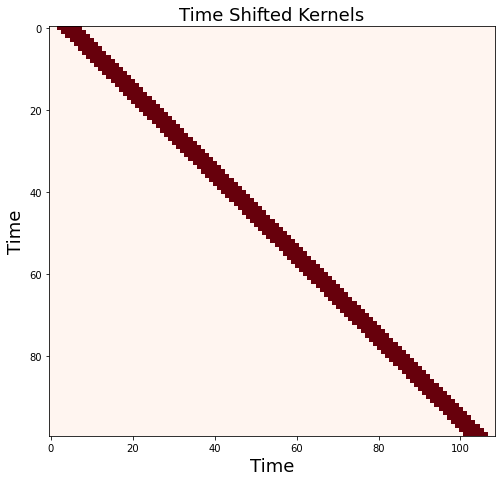

In [4]:
shifted_kernel = np.zeros((n_samples, n_samples+len(kernel) - 1))
for i in range(n_samples):
    shifted_kernel[i, i:i+len(kernel)] = kernel

plt.figure(figsize=(8, 8))
plt.imshow(shifted_kernel, cmap='Reds')
plt.xlabel('Time', fontsize=18)
plt.ylabel('Time', fontsize=18)
plt.title('Time Shifted Kernels', fontsize=18)

Now, let's take the dot product of the signal with this matrix. 

To refresh your memory from basic linear algebra. Matrix multiplication consists of taking the dot product of the signal vector with each row of this expanded kernel matrix.  

Text(0.5, 1.0, 'Signal convolved with boxcar kernel')

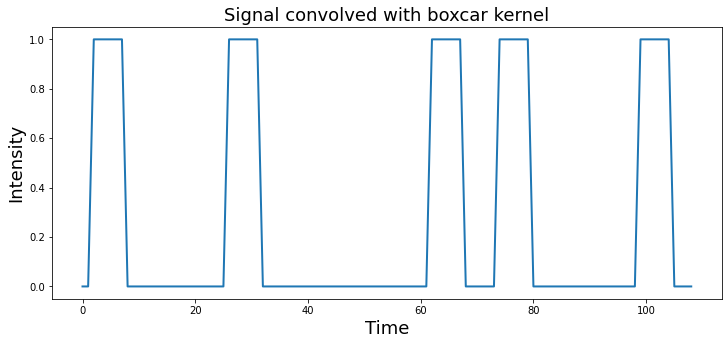

In [5]:
convolved_signal = np.dot(signal, shifted_kernel)

plt.figure(figsize=(12, 5))
plt.plot(convolved_signal, linewidth=2)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.title('Signal convolved with boxcar kernel', fontsize=18)

You can see that after convolution, each spike has now become the shape of the kernel. Spikes that were closer in time, compound if the boxes overlap.

Notice also how the shape of the final signal is the length of the combined signal and kernel minus one.

In [6]:
print(f"Signal Length: {len(signal)}")
print(f"Kernel Length: {len(kernel)}")
print(f"Convolved Signal Length: {len(convolved_signal)}")

Signal Length: 100
Kernel Length: 10
Convolved Signal Length: 109


this process of iteratively taking the dot product of the kernel with each timepoint of the signal and summing all of the values can be performed by using the convolution function from numpy `np.convolve`

Text(0.5, 1.0, 'Signal convolved with boxcar kernel')

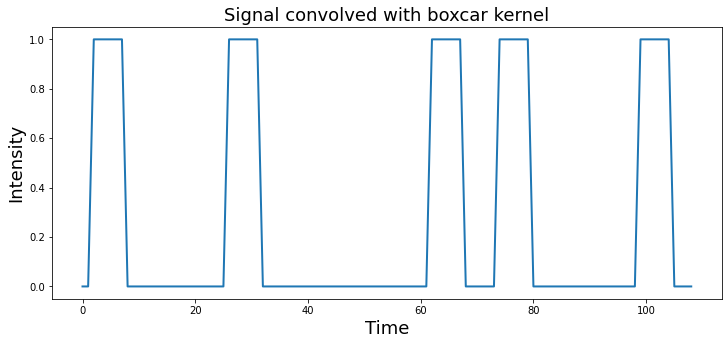

In [7]:
plt.figure(figsize=(12, 5))
plt.plot(np.convolve(signal, kernel), linewidth=2)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.title('Signal convolved with boxcar kernel', fontsize=18)

What happens if the spikes have different intensities, reflected by different heights?

Text(0.5, 0, 'Time')

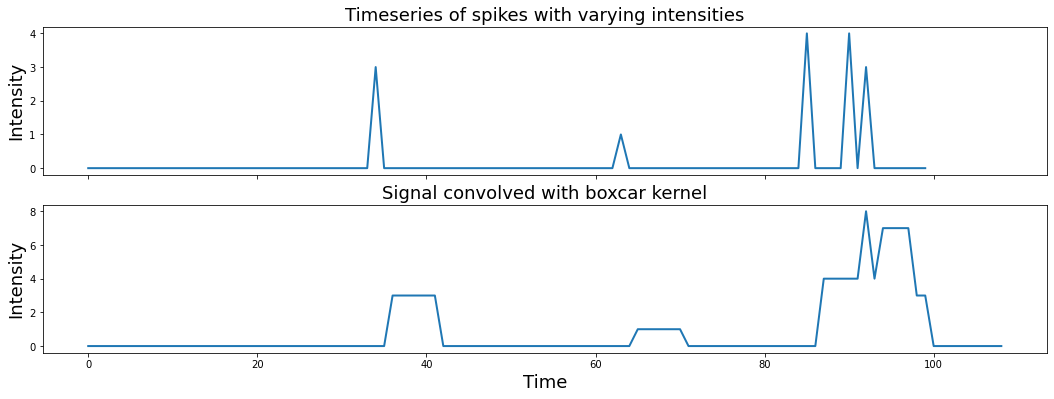

In [8]:
signal = np.zeros(n_samples)
signal[np.random.randint(0,n_samples,5)] = np.random.randint(1,5,5)

f,a = plt.subplots(nrows=2, figsize=(18,6), sharex=True)
a[0].plot(signal, linewidth=2)
a[0].set_ylabel('Intensity', fontsize=18)
a[0].set_title('Timeseries of spikes with varying intensities', fontsize=18)
a[1].plot(np.convolve(signal, kernel), linewidth=2)
a[1].set_ylabel('Intensity', fontsize=18)
a[1].set_title('Signal convolved with boxcar kernel', fontsize=18)
a[1].set_xlabel('Time', fontsize=18)

Now what happens if we switch out the boxcar kernel for something with a more interesting shape, say a hemodynamic response function?  

Here we will use a double gamma hemodynamic function (HRF) developed by Gary Glover. 

**Note**: If you haven't install nltools yet run `!pip install nltools`.  You may need to restart your jupyter kernel as well.

/Users/lukechang/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


Text(0.5, 1.0, 'Hemodynamic Response Function')

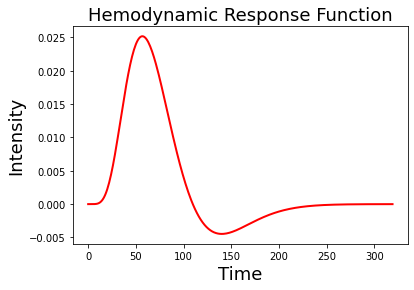

In [9]:
from nltools.external import glover_hrf

tr = 2
hrf = glover_hrf(tr, oversampling=20)
plt.plot(hrf, linewidth=2, color='red')
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.title('Hemodynamic Response Function', fontsize=18)


For this example, we oversampled the function to make it more smooth.  In practice we will want to make sure that the kernel is the correct shape given our sampling resolution.  Be sure to se the oversampling to 1.  Notice how the function looks more jagged now?

Text(0.5, 1.0, 'Hemodynamic Response Function')

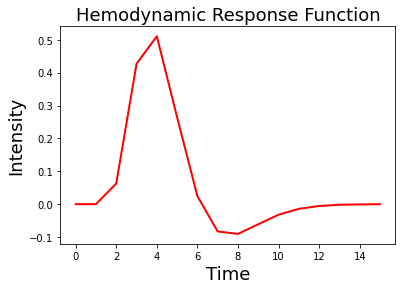

In [10]:
hrf = glover_hrf(tr, oversampling=1)
plt.plot(hrf, linewidth=2, color='red')
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.title('Hemodynamic Response Function', fontsize=18)


Now let's try convolving our event pulses with this HRF kernel.

Text(0.5, 1.0, 'Signal convolved with boxcar kernel')

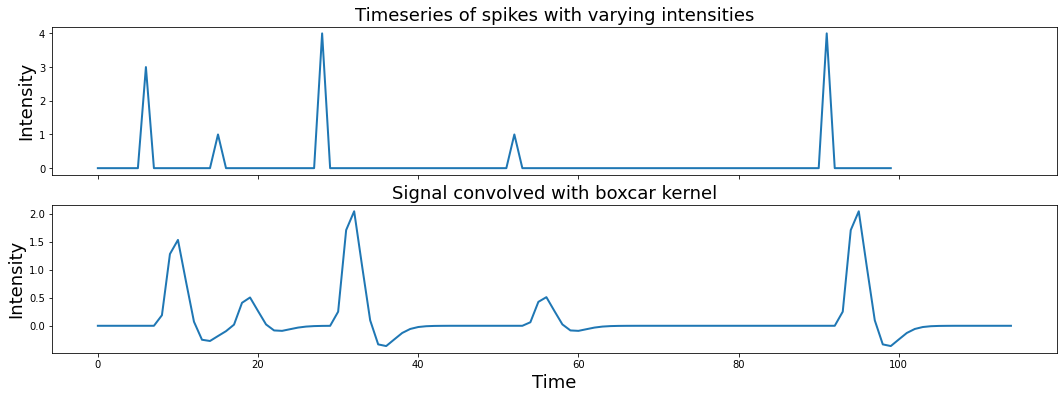

In [11]:
signal = np.zeros(n_samples)
signal[np.random.randint(0,n_samples,5)] = np.random.randint(1,5,5)

f,a = plt.subplots(nrows=2, figsize=(18,6), sharex=True)
a[0].plot(signal, linewidth=2)
a[1].plot(np.convolve(signal, hrf), linewidth=2)
a[0].set_ylabel('Intensity', fontsize=18)
a[0].set_title('Timeseries of spikes with varying intensities', fontsize=18)
a[1].set_ylabel('Intensity', fontsize=18)
a[1].set_xlabel('Time', fontsize=18)
a[1].set_title('Signal convolved with boxcar kernel', fontsize=18)


If you are interested in a more detailed overview of convolution in the time domain, I encourage you to watch this [video](https://youtu.be/9Hk-RAIzOaw) by Mike X Cohen. For more details about convolution and the HRF function, see this [overview](https://practical-neuroimaging.github.io/on_convolution.html) using python examples. 

## Oscillations

Ok, now let's move on to studying time-varying signals that have the shape of oscillating waves.

Let's watch a short video by Mike X Cohen to get some more background on sine waves. Don't worry too much about the matlab code as we will work through similar Python examples in this notebook.

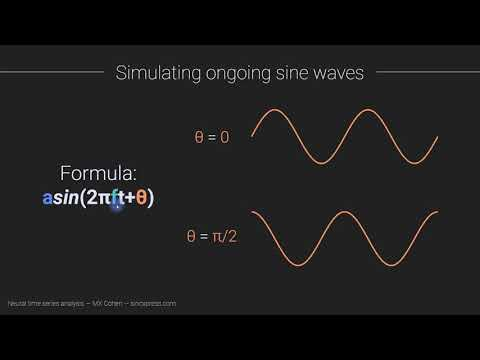

In [24]:
from IPython.display import YouTubeVideo

YouTubeVideo('9RvZXZ46FRQ')

Oscillations can be described mathematically as:

$A\sin(2 \pi ft + \theta)$

where $f$ is the frequency or the speed of the oscillation described in the number of cycles per second - $Hz$. Amplitude $A$ refers to the height of the waves, which is half the distance of the peak to the trough. Finally, $\theta$ describes the phase angle offset, which is in radians.

Here we will plot a simple sine wave.  Try playing with the different parameters (i.e., amplitude, frequency, & theta) to gain an intuition of how they each impact the shape of the wave.

Text(0, 0.5, 'Amplitude')

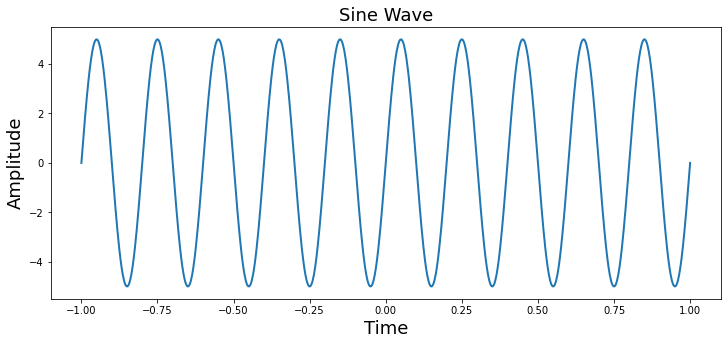

In [12]:
from numpy import sin, pi, arange

sampling_freq = 500
time = arange(-1, 1 + 1/sampling_freq, 1/sampling_freq)
amplitude = 5
freq = 5
theta = 0

simulation = amplitude * sin(2 * pi * freq * time + theta)

plt.figure(figsize=(12, 5))
plt.plot(time, simulation, linewidth=2)
plt.title('Sine Wave', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)

We can also see the impact of different parameters using interactive widgets. Here you can move the sliders to see the impact of varying the amplitude, frequency, and theta parameter on a sine wave. We also show the complex components of the sine wave in the right panel.

In [13]:
from ipywidgets import interact, FloatSlider
from numpy import sin, pi, arange, real, imag

def plot_oscillation(amplitude=5, frequency=5, theta=1):
    sampling_frequency=500
    time = arange(-1, 1 + 1/sampling_frequency, 1/sampling_frequency)
    simulation = amplitude * sin(2 * pi * frequency * time + theta)
    z = np.exp(1j*(2 * pi * frequency * time + theta))

    fig = plt.figure(figsize=(20, 4))
    gs = plt.GridSpec(1, 6, left=0.05, right=0.48, wspace=0.05)
    ax1 = fig.add_subplot(gs[0, :4])
    ax1.plot(time, simulation, linewidth=2)
    ax1.set_ylabel('Amplitude', fontsize=18)
    ax1.set_xlabel('Time', fontsize=18)
    ax2 = fig.add_subplot(gs[0, 5:], polar=True)
    ax2.plot(real(simulation), imag(simulation))
    plt.tight_layout()

interact(plot_oscillation, amplitude=FloatSlider(value=5, min=0, max=10, step=0.5),
         frequency=FloatSlider(value=5, min=0, max=10, step=0.5), 
         theta=FloatSlider(value=0, min=-5, max=5, step=0.5))

interactive(children=(FloatSlider(value=5.0, description='amplitude', max=10.0, step=0.5), FloatSlider(value=5…

<function __main__.plot_oscillation(amplitude=5, frequency=5, theta=1)>

Next we will generate a simulation combining multiple sine waves oscillating at different frequencies. 

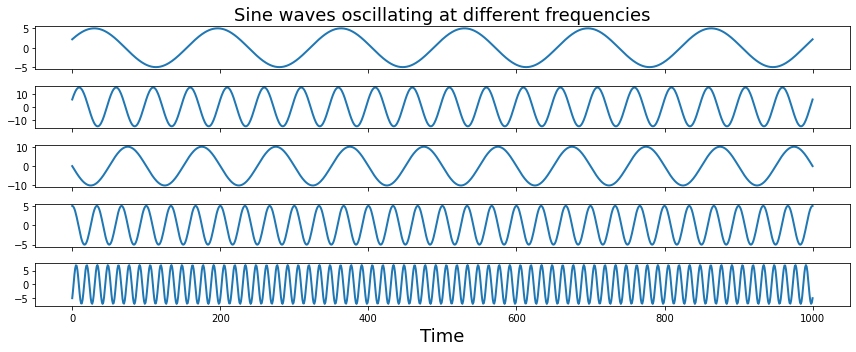

In [14]:
sampling_freq = 500

freq = [3, 10, 5 ,15, 35]
amplitude = [5, 15, 10, 5, 7]
phases = pi*np.array([1/7, 1/8, 1, 1/2, -1/4])

time = arange(-1, 1 + 1/sampling_freq, 1/sampling_freq) 

sine_waves = []
for i,f in enumerate(freq):
    sine_waves.append(amplitude[i] * sin(2*pi*f*time + phases[i]))
sine_waves = np.array(sine_waves)


f,a = plt.subplots(nrows=5, ncols=1, figsize=(12,5), sharex=True)
for i,x in enumerate(freq):
    a[i].plot(sine_waves[i,:], linewidth=2)
a[0].set_title("Sine waves oscillating at different frequencies", fontsize=18)
a[i].set_xlabel("Time", fontsize=18)
plt.tight_layout()    

Let's add all of those signals together to get a more complex signal.

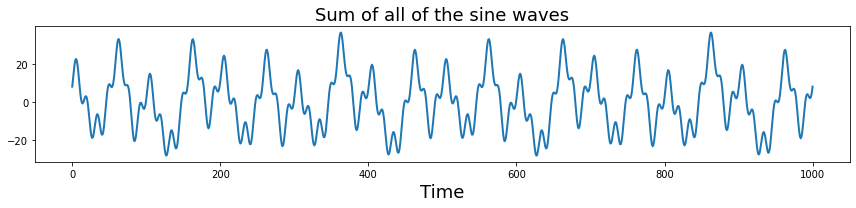

In [15]:
plt.figure(figsize=(12,3))
plt.plot(np.sum(sine_waves, axis=0), linewidth=2)
plt.xlabel('Time', fontsize=18)
plt.title("Sum of all of the sine waves", fontsize=18)
plt.xlabel("Time", fontsize=18)
plt.tight_layout()

What is the effect of changing the sampling frequency on our ability to measure these oscillations?  Try dropping it to be very low (e.g., less than 70 hz.)  Notice that signals will alias when the sampling frequency is below the nyquist frequency of a signal. To observe the oscillations, we need to be sampling at least two times for each oscillation cycle. This will result in a jagged view of the data, but we can still theoretically observe the frequency. Practically, higher sampling rates allow us to better observe the underlying signals.

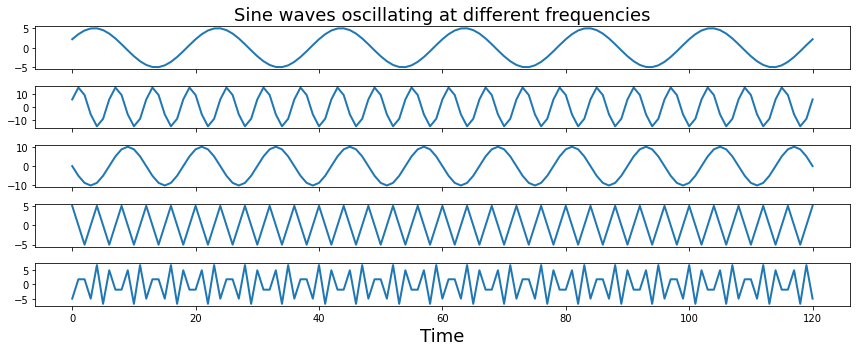

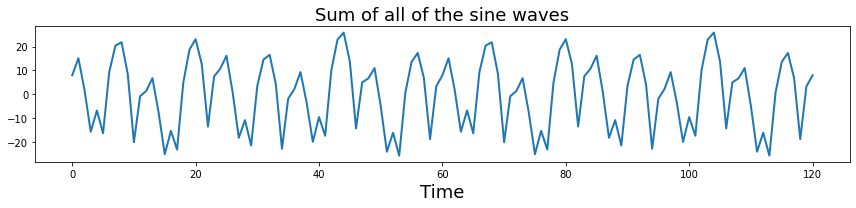

In [16]:
sampling_freq = 60

freq = [3, 10, 5 ,15, 35]
amplitude = [5, 15, 10, 5, 7]
phases = pi*np.array([1/7, 1/8, 1, 1/2, -1/4])

time = arange(-1, 1 + 1/sampling_freq, 1/sampling_freq) 

sine_waves = []
for i,f in enumerate(freq):
    sine_waves.append(amplitude[i] * sin(2*pi*f*time + phases[i]))
sine_waves = np.array(sine_waves)


f,a = plt.subplots(nrows=5, ncols=1, figsize=(12,5), sharex=True)
for i,x in enumerate(freq):
    a[i].plot(sine_waves[i,:], linewidth=2)
a[0].set_title("Sine waves oscillating at different frequencies", fontsize=18)
a[i].set_xlabel("Time", fontsize=18)
plt.tight_layout()    


plt.figure(figsize=(12,3))
plt.plot(np.sum(sine_waves, axis=0), linewidth=2)
plt.title("Sum of all of the sine waves", fontsize=18)
plt.xlabel("Time", fontsize=18)
plt.tight_layout()    


Notice the jagged lines for frequencies that are above the nyquist frequency? That's because we don't have enough samples to accurately see the oscillations.


Ok, let's increase the sampling frequency to remove the aliasing. We can add a little bit of gaussian (white) noise on top of this signal to make it even more realistic.  Try varying the amount of noise by adjusting the scaling on the noise. 

Text(0.5, 0, 'Time')

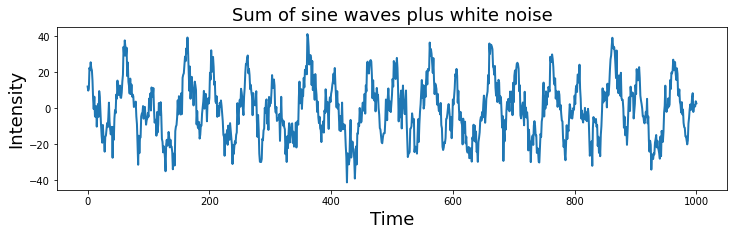

In [17]:
sampling_freq = 500

freq = [3, 10, 5 ,15, 35]
amplitude = [5, 15, 10, 5, 7]
phases = pi*np.array([1/7, 1/8, 1, 1/2, -1/4])

time = arange(-1, 1 + 1/sampling_freq, 1/sampling_freq) 

sine_waves = []
for i,f in enumerate(freq):
    sine_waves.append(amplitude[i] * sin(2*pi*f*time + phases[i]))
sine_waves = np.array(sine_waves)


noise = 5 * np.random.randn(sine_waves.shape[1])
signal = np.sum(sine_waves,axis=0) + noise

plt.figure(figsize=(12,3))
plt.plot( signal, linewidth=2)
plt.title("Sum of sine waves plus white noise", fontsize=18)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)

# Time & Frequency Domains
We have seen above how to represent signals in the time domain. However, these signals can also be represented in the frequency domain.

Let's get started by watching a short video by Mike X Cohen to get an overview of how a signal can be represented in both of these different domains.

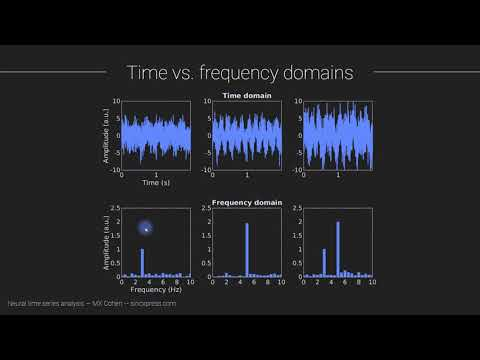

In [48]:
YouTubeVideo('fYtVHhk3xJ0')

# Frequency Domain

In the previous example, we generated a complex signal composed of multiple sine waves oscillating at different frequencies. Typically in data analysis, we only observe the signal and are trying to uncover the generative processes that gave rise to the signal.  In this section, we will introduce the frequency domain and how we can identify if there are any frequencies oscillating at a consistent frequency in our signal using the fourier transform. The fourier transform is essentially convolving different frequencies of sine waves with our data.

One important assumption to note is that the fourier transformations assume that your oscillatory signals are stationary, which means that the generative processes giving rise to the oscillations do not vary over time. 

See this [video](https://youtu.be/rea6M1oagmA) for a more in depth discussion on stationarity.  In practice, this assumption is rarely true.  Often it can be useful to use other techniques such as wavelets to look at time x frequency representations. We will not be covering wavelets here, but see this series of [videos](https://youtu.be/7ahrcB5HL0k) for more information.

## Discrete Time Fourier Transform
We will gain an intution of how the fourier transform works by building our own discrete time fourier transform.  

Let's watch this short video about the fourier transform by Mike X Cohen. Don't worry too much about the details of the discussion on the matlab code as we will be exploring these concepts in python below.

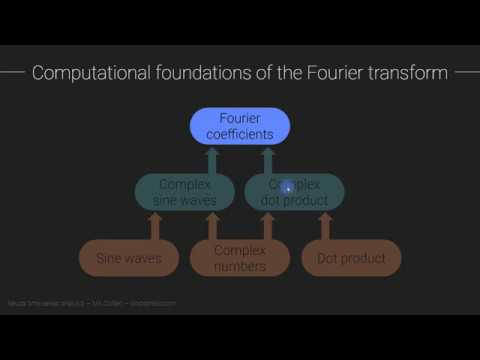

In [114]:
YouTubeVideo('_htCsieA0_U')

The discrete Fourier transform of variable $x$ at frequency $f$ can be defined as:

$X_f = \sum\limits_{k=0}^{n-1} x_k e^{-i2\pi f(k-1)n^{-1}}$
 where $n$ refers to the number of data points in vector $x$, and the capital letter $X_f$ is the fourier coefficient of time series variable $x$ at frequency $f$.
 
Essentially, we create a bank of complex sine waves at different frequencies that are linearly spaced. The zero frequency component reflects the mean offset over the entire signal and will simply be zero in our example.

### Complex Sine Waves
You may have noticed that we are computing *complex* sine waves using the `np.exp` function instead of the `np.sin` function. 

$$\text{complex sine wave} = e^{i(2\pi ft + \theta)}$$

We will not spend too much time on the details, but basically complex sine waves have three components: time, a real part of the sine wave, and the imaginary part of the sine wave, which are basically phase shifted by $\frac{\pi}{2}$. 
`1j` is how we can specify a complex number in python. We can extract the real components using `np.real` or the imaginary using `np.imag`. 

We can visualize complex sine waves in three dimensions. For more information, watch this [video](https://youtu.be/iZCDOuzfsY0). If you need a refresher on complex numbers, you may want to watch this [video](https://youtu.be/fNfXKiIIufY).

In this plot we show this complex signal in 3 dimensions and also project on two dimensional planes to show that the real and imaginary create a unit circle, and are phase offset by $\frac{\pi}{2}$ with respect to time.

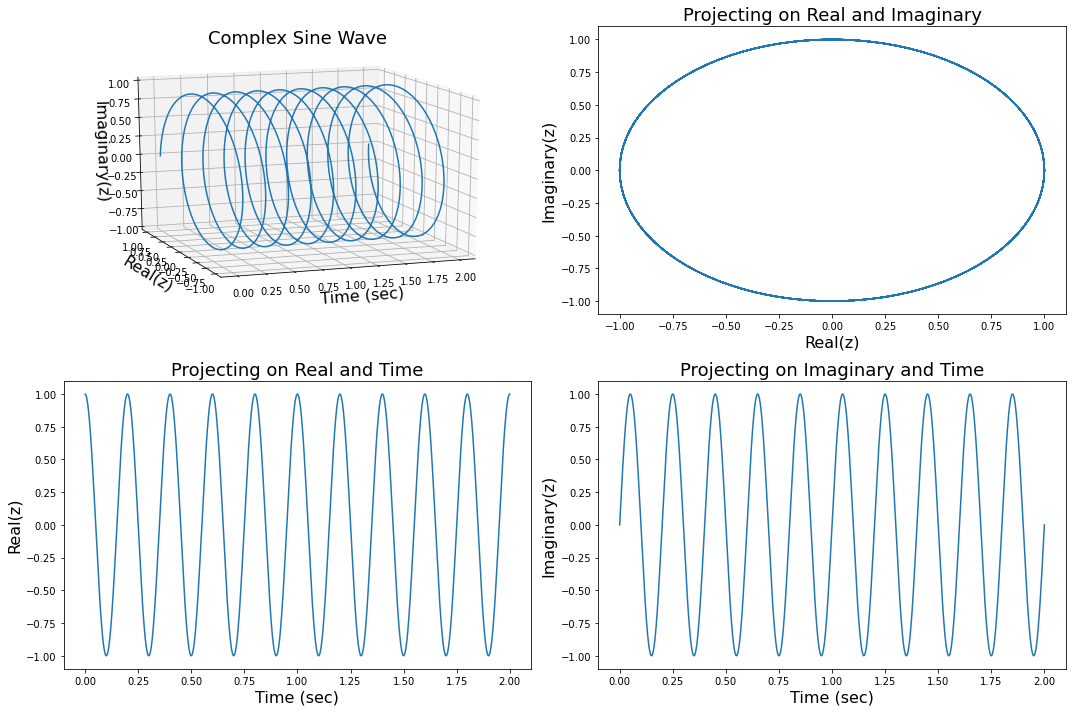

In [67]:
from mpl_toolkits import mplot3d

frequency = 5
z =  np.exp(1j*(2 * pi * frequency * time + theta))

fig= plt.figure(figsize=(15, 10))
ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.plot(np.arange(0, len(time))/sampling_freq, real(z), imag(z))
ax.set_xlabel('Time (sec)', fontsize=16)
ax.set_ylabel('Real(z)', fontsize=16)
ax.set_zlabel('Imaginary(z)', fontsize=16)
ax.set_title('Complex Sine Wave', fontsize=18)
ax.view_init(15, 250)

ax = fig.add_subplot(2, 2, 2)
ax.plot(real(z), imag(z))
ax.set_xlabel('Real(z)', fontsize=16)
ax.set_ylabel('Imaginary(z)', fontsize=16)
ax.set_title('Projecting on Real and Imaginary', fontsize=18)

ax = fig.add_subplot(2, 2, 3)
ax.plot(np.arange(0, len(time))/sampling_freq, real(z))
ax.set_xlabel('Time (sec)', fontsize=16)
ax.set_ylabel('Real(z)', fontsize=16)
ax.set_title('Projecting on Real and Time', fontsize=18)

ax = fig.add_subplot(2, 2, 4,)
ax.plot(np.arange(0, len(time))/sampling_freq, imag(z))
ax.set_xlabel('Time (sec)', fontsize=16)
ax.set_ylabel('Imaginary(z)', fontsize=16)
ax.set_title('Projecting on Imaginary and Time', fontsize=18)
plt.tight_layout()

### Create a filter bank
Ok, now let's create a bank of n-1 linearly spaced complex sine waves and plot first 5 waves to see their frequencies.

Remember the first basis function is zero frequency component and reflects the mean offset over the entire signal.

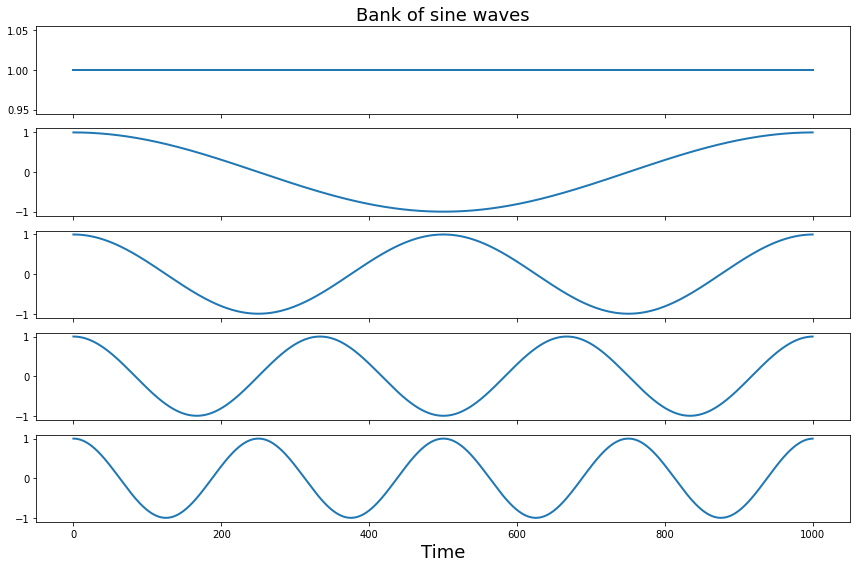

In [201]:
import numpy as np
from numpy import exp

time = np.arange(0, len(signal), 1)/len(signal)

sine_waves = []
for i in range(len(signal)):
    sine_waves.append(exp(-1j*2*pi*i*time))
sine_waves = np.array(sine_waves)

f,a = plt.subplots(nrows=5, figsize=(12,8), sharex=True)
for i in range(0,5):
    a[i].plot(sine_waves[i,:], linewidth=2)
a[0].set_title('Bank of sine waves', fontsize=18)
a[i].set_xlabel('Time', fontsize=18)
plt.tight_layout()

We can visualize all of the sine waves simultaneously using a heatmap representation.  Each row is a different sine wave, and columns reflect time.  The intensity of the value is like if the sine wave was coming towards and away rather than up and down. Notice how it looks like that the second half of the sine waves appear to be a mirror image of the first half.  This is because the first half contain the *positive* frequencies, while the second half contains the *negative* frequencies.  Negative frequencies capture sine waves that travel in reverse order around the complex plane compared to that travel forward. This becomes more relevant with the hilbert transform, but for the purposes of this tutorial we will be ignoring the negative frequencies.

Text(0.5, 0, 'Time')

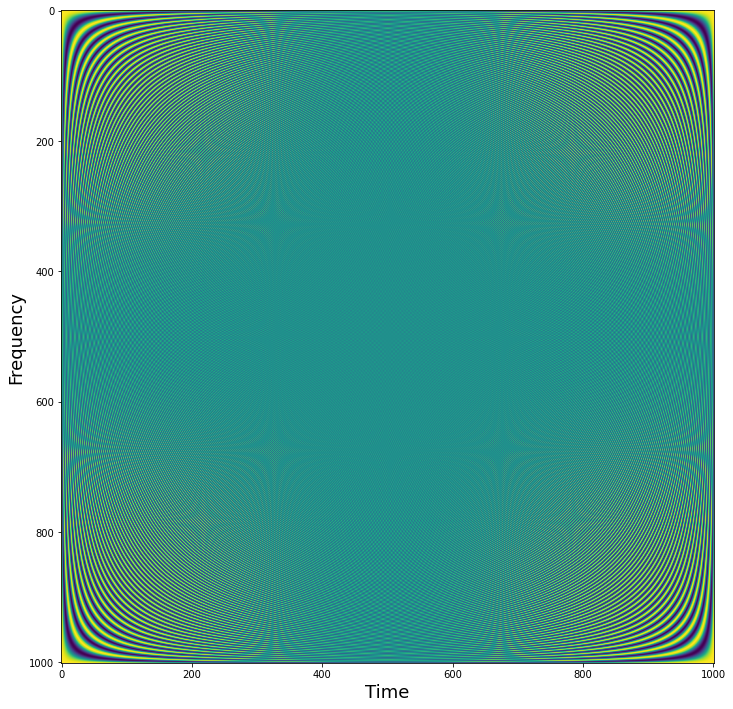

In [52]:
plt.figure(figsize = (12, 12))
plt.imshow(np.real(sine_waves))
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Time', fontsize=18)

### Estimate Fourier Coefficients

Now let's take the dot product of each of the sine wave basis set with our signal to get the fourier coefficients. 

We can *scale* the coefficients to be more interpretable by dividing by the number of time points and multiplying by 2. Watch this [video](https://youtu.be/Ee9btm3tros) if you're interested in a more detailed explanation. Basically, this only needs to be done if you want the amplitude to be in the same units as the original data. In practice, this scaling factor will not change your interpretation of the spectrum.

In [183]:
fourier = 2*np.dot(signal, sine_waves)/len(signal)

### Visualizing Fourier Coefficients

Now that we have computed the fourier transform, we might want to examine the results.  The fourier transform provides a 3-D representation of the data including frquency, power, and phase. Typically, the phase information is ignored when plotting the results of a fourier analysis. The traditional way to view the information is plot the data as amplitude on the *y-axis* and frequency on the *x-axis*. We will extract amplitude by taking the absolute value of the fourier coefficients. Remember that we are only focusing on the positive frequencies (the 1st half of the sine wave basis functions).

Here the x axis simply reflects the index of the frequency.  The actual frequency is $N/2 + 1$ as we are only able estimate frequencies that are half the sampling frequency, this is called the Nyquist frequency. Also, note that we are only plotting the first half of the frequencies. This is because we are only plotting the *positive* frequencies. We will ignore frequencies above the nyquist frequency (i.e., $\frac{\text{fs}}{2}$), which are called negative frequencies. Watch this [video](https://youtu.be/Nupda1rm01Y) if you'd like more information about why. 

Watch this [video](https://youtu.be/oh7WvhlkxnU) to hear more about frequencies and zero padding.


Text(0.5, 1.0, 'Power spectrum derived from discrete fourier transform')

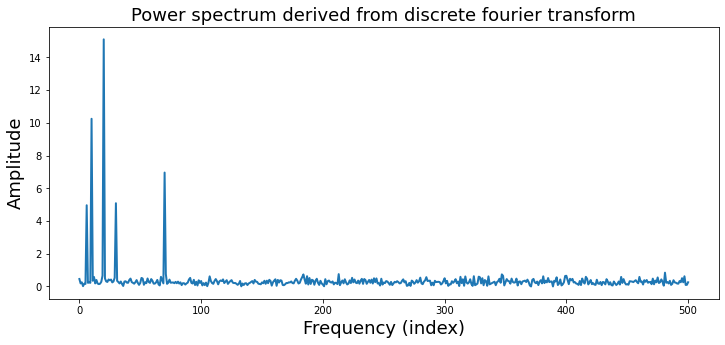

In [184]:
plt.figure(figsize=(12, 5))
plt.plot(np.abs(fourier[0:int(np.ceil(len(fourier)/2))]), linewidth=2)
plt.xlabel('Frequency (index)', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)
plt.title('Power spectrum derived from discrete fourier transform', fontsize=18)

Notice that there are 5 different frequencies that have varying amplitudes. Recall that when we simulated this data we added 5 different sine waves with different frequencies and amplitudes. 

`freq = [3, 10, 5 ,15, 35]`
`amplitude = [5, 15, 10, 5, 7]`

Let's zoom in a bit more to see this more clearly and also add the correct frequency labels in $Hz$. We will use the numpy `fftfreq` function to help convert frequency indices to $Hz$.

Text(0.5, 1.0, 'Power spectrum derived from discrete fourier transform')

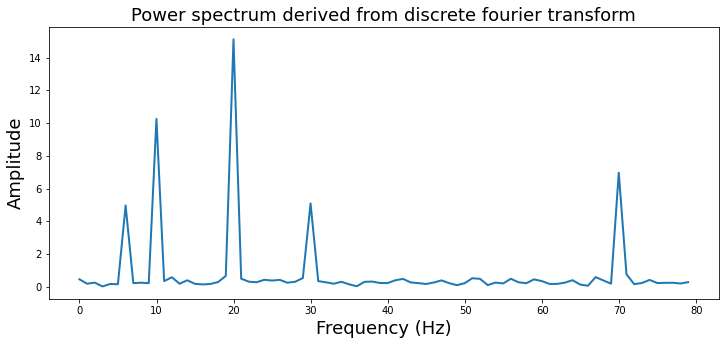

In [185]:
from numpy.fft import fftfreq

freq = 2*fftfreq(len(signal),1/sampling_freq)

plt.figure(figsize=(12,5))
plt.plot(freq[:80], np.abs(fourier)[0:80], linewidth=2)
plt.xlabel('Frequency (Hz)', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)
plt.title('Power spectrum derived from discrete fourier transform', fontsize=18)

Ok, now that we've created our own discrete fourier transform, let's learn a few more important details that are important to consider.

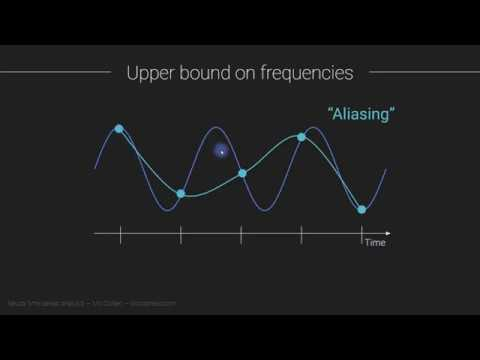

In [121]:
YouTubeVideo('RHjqvcKVopg')

## Inverse Fourier Transform

The fourier transform allows you to represent a time series in the frequency domain. This is a lossless operation, meaning that no information in the original signal is lost by the transform. This means that we can reconstruct the original signal by inverting the operation. Thus, we can create a time series with only the frequency domain information using the *inverse fourier transform*. Watch this [video](https://youtu.be/HFacSL--vps) if you would like a more in depth explanation.

$x_k = \sum\limits_{k=0}^{n-1} X_k e^{i2\pi f(k-1)n^{-1}}$

Notice that we are computing the dot product between the complex sine wave and the fourier coefficients $X$ instead of the time series data $x$.

Text(0.5, 1.0, 'Reconstructed Time Series Signal')

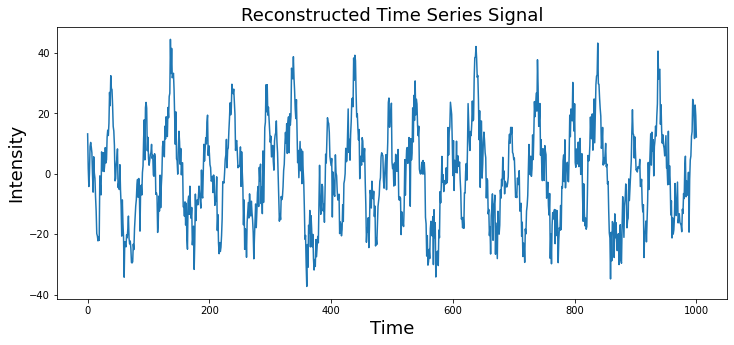

In [189]:
plt.figure(figsize=(12,5))
plt.plot(np.dot(fourier, sine_waves)/2)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.title('Reconstructed Time Series Signal', fontsize=18)

## Fast Fourier Transform

The discrete time fourier transform is useful to understand the relationship between the time and frequency domains. However, in practice this method is rarely used as there are more faster and efficient methods to perform this computation. One popular algorithm is called the fast fourier transform (FFT). This function is also in numpy `np.fft.fft`. Don't forget to divide by the number of samples to keep the scaling.

Text(0.5, 1.0, 'Frequency domain representation of signal derived from fast fourier transform')

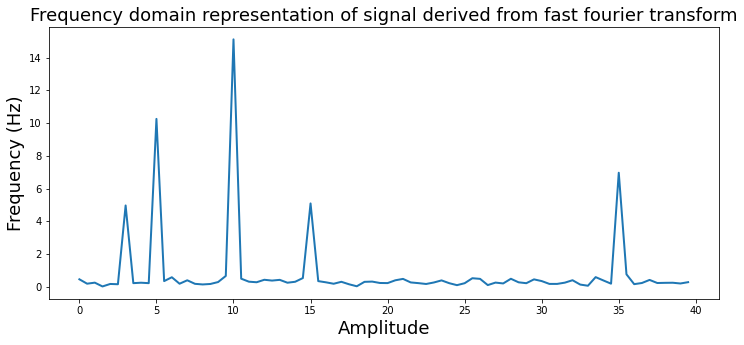

In [202]:
from numpy.fft import fft, ifft, fftfreq

fourier_fft = fft(signal)

plt.figure(figsize=(12,5))
plt.plot((np.arange(0,80)/2), 2*np.abs(fourier_fft[0:80])/len(signal), linewidth=2)
plt.xlabel('Amplitude', fontsize=18)
plt.ylabel('Frequency (Hz)', fontsize=18)
plt.title('Frequency domain representation of signal derived from fast fourier transform', fontsize=18)

We can also use the `ifft` to perform an inverse fourier transform. 

Text(0.5, 1.0, 'Reconstructed Time Series Signal')

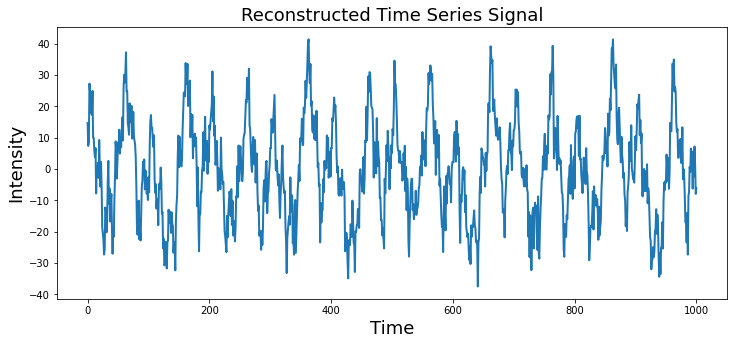

In [139]:
plt.figure(figsize=(12, 5))
plt.plot(ifft(fourier_fft), linewidth=2)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.title('Reconstructed Time Series Signal', fontsize=18)

## Convolution Theorem
Convolution in the time domain is the same multiplication in the frequency domain. This means that time domain convolution computations can be performed much more efficiently in the frequency domain via simple multiplication. (The opposite is also true that multiplication in the time domain is the same as convolution in the frequency domain. Watch this [video](https://youtu.be/hj7j4Q8T3Ck) for an overview of the convolution theorem and convolution in the frequency domain.

![ConvolutionTheorem.png](../../images/signal_processing/ConvolutionTheorem.png)

# Filters

Filters can be classified as finite impulse response (FIR) or infinite impulse response (IIR). These terms describe how a filter responds to a single input impulse.  FIR filters have a response that ends at a disrete point in time, while IIR filters have a response that continues indefinitely.

Filters are constructed in the frequency domain and several properties that need to be considers.

- ripple in the pass-band
- attenuation in the stop-band
- steepness of roll-off
- filter order (i.e., length for FIR filters)
- time-domain ringing

In general, there is a frequency by time tradeoff.  The sharper something is in frequency, the broader it is in time, and vice versa.

Here we will use IIR butterworth filters as an example.

## High Pass
High pass filters only allow high frequency signals to remain, effectively *removing* any low frequency information.

Here we will construct a high pass butterworth filter and plot it in frequency space.

**Note**: this example requires using scipy 1.2.1+.

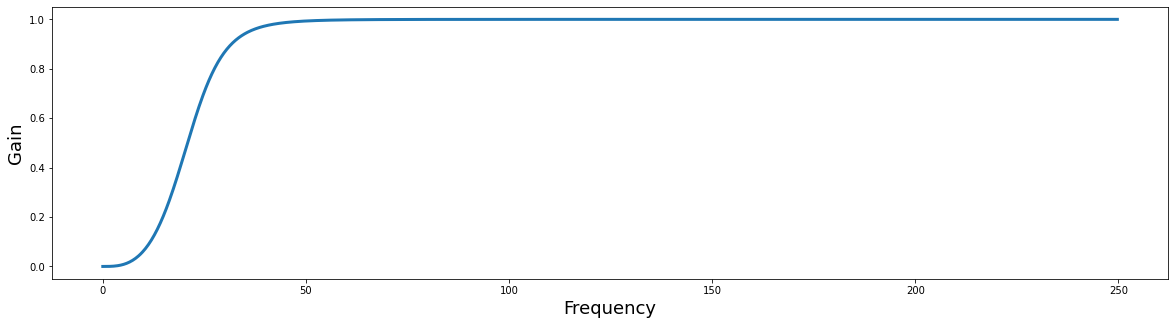

In [140]:
from scipy.signal import butter, filtfilt, freqz

filter_order = 3
frequency_cutoff = 25
sampling_frequency = 500

# Create the filter
b, a = butter(filter_order, frequency_cutoff, btype='high', output='ba', fs=sampling_frequency)

def rad_sample_to_hz(x, fs):
    return (x*fs)/(2*np.pi)

def plot_filter(b, a, fs):
    plt.figure(figsize=(20,5))
    w, h = freqz(b, a, worN=512*2, whole=False)
    plt.plot(rad_sample_to_hz(w, fs), abs(h), linewidth=3)
    plt.ylabel('Gain', fontsize=18)
    plt.xlabel('Frequency', fontsize=18)
    
plot_filter(b, a, sampling_frequency)

Notice how the gain scales from [0,1]?  Filters can be multiplied by the FFT of a signal to apply the filter in the frequency domain. When the resulting signal is transformed back in the time domain using the inverse FFT, the new signal will be filtered. This can be much faster than applying filters in the time domain.

The filter_order parameter adjusts the sharpness of the cutoff in the frequency domain.  Try playing with different values to see how it changes the filter plot.

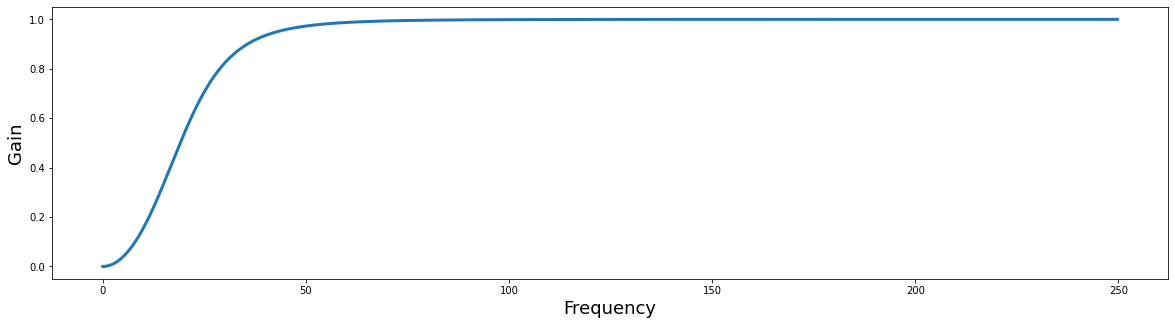

In [141]:
filter_order = 2
frequency_cutoff = 25
sampling_frequency = 500


b, a = butter(filter_order, frequency_cutoff, btype='high', output='ba', fs=sampling_frequency)    

plot_filter(b, a, sampling_frequency)

What does the filter look like in the temporal domain?  Let's take the inverse FFT and plot it to see what it looks like as a kernel in the temporal domain.  Notice how changing the filter order adds more ripples in the time domain.

Text(0.5, 0, 'Time')

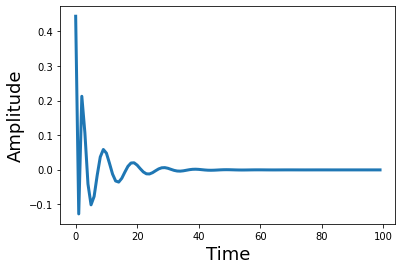

In [142]:
from scipy.signal import sosfreqz

filter_order = 8
sos = butter(filter_order, frequency_cutoff, btype='high', output='sos', fs=sampling_frequency)    
w_sos, h_sos = sosfreqz(sos)

plt.plot(ifft(h_sos)[0:100], linewidth=3)
plt.ylabel('Amplitude', fontsize=18)
plt.xlabel('Time', fontsize=18)

Now let's apply the filter to our data. We will be applying the filter to the signal in the time domain using the `filtfilt` function. This is a good default option, even though there are several other functions to apply the filter. `filtfilt` applies the filter forward and then in reverse ensuring that there is zero-phase distortion.

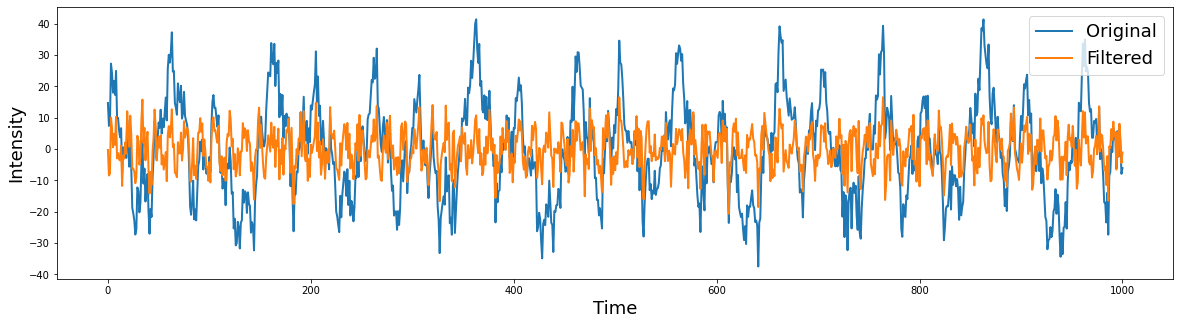

In [143]:
filtered = filtfilt(b, a, signal)

plt.figure(figsize=(20,5))
plt.plot(signal, linewidth=2)
plt.plot(filtered, linewidth=2)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.legend(['Original','Filtered'], fontsize=18)

## Low Pass
Low pass filters only retain low frequency signals, which *removes* any high frequency information.

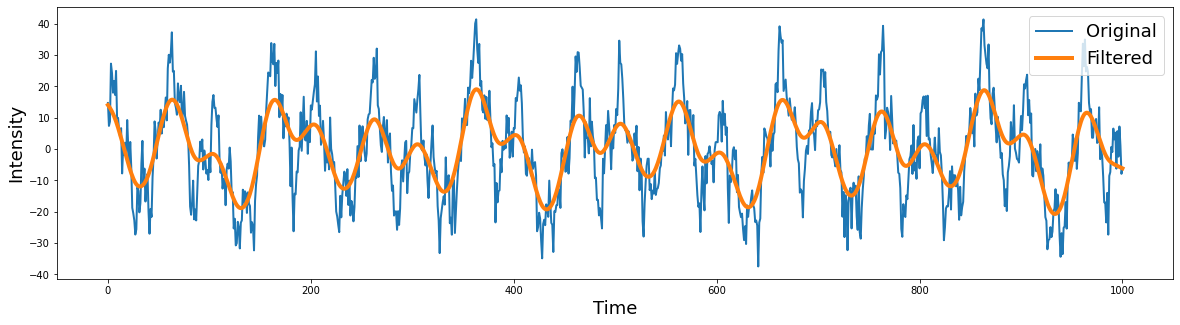

In [147]:
from scipy.signal import butter, filtfilt

filter_order = 2 
frequency_cutoff = 10
sampling_frequency = 500

# Create the filter
b, a = butter(filter_order, frequency_cutoff, btype='low', output='ba', fs=sampling_frequency)

# Apply the filter
filtered = filtfilt(b, a, signal)

plt.figure(figsize=(20,5))
plt.plot(signal, linewidth=2)
plt.plot(filtered, linewidth=4)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.legend(['Original','Filtered'], fontsize=18)

What does the filter look like?

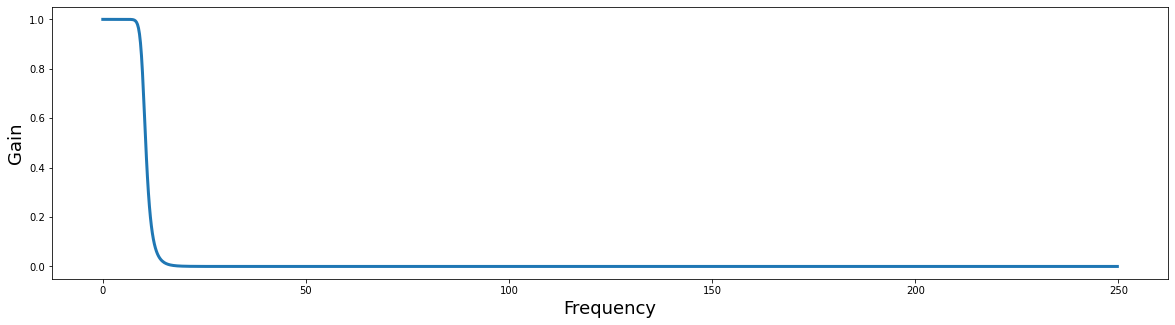

In [145]:
filter_order = 10
frequency_cutoff = 10
sampling_frequency = 500

# Create the filter
b, a = butter(filter_order, frequency_cutoff, btype='low', output='ba', fs=sampling_frequency)

plot_filter(b, a, sampling_frequency)

## Bandpass

Bandpass filters permit retaining only a specific frequency. Morlet wavelets are an example of a bandpass filter.  or example a Morlet wavelet is a gaussian with the peak frequency at the center of a bandpass filter.

Let's try selecting removing specific frequencies

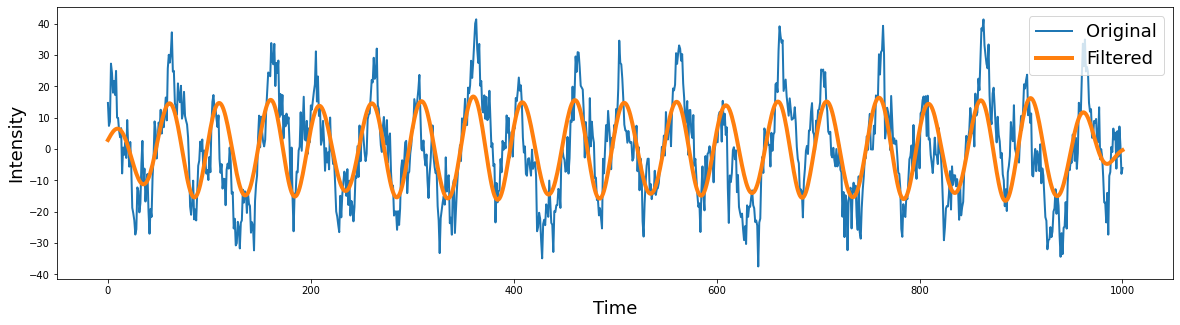

In [148]:
filter_order = 2 
lowcut = 7
highcut = 13

# Create the filter
b, a = butter(filter_order, [lowcut, highcut], btype='bandpass', output='ba', fs=sampling_frequency)

# Apply the filter
filtered = filtfilt(b, a, signal)

plt.figure(figsize=(20,5))
plt.plot(signal, linewidth=2)
plt.plot(filtered, linewidth=4)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.legend(['Original','Filtered'], fontsize=18)

## Band-Stop
Bandstop filters remove a specific frequency from the signal

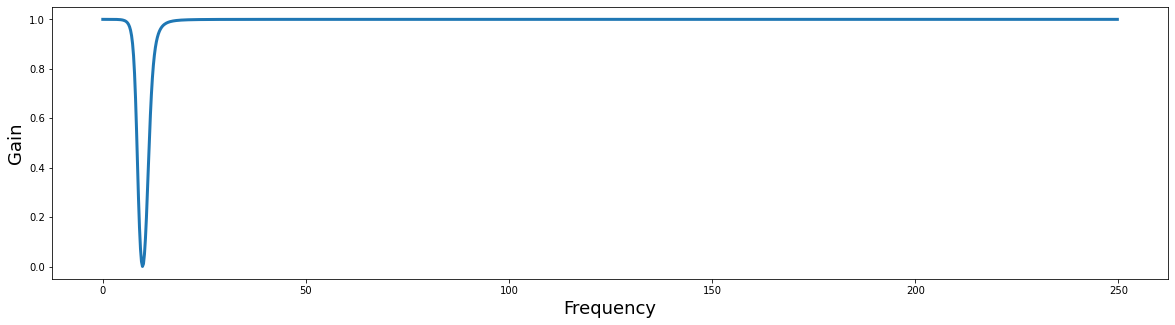

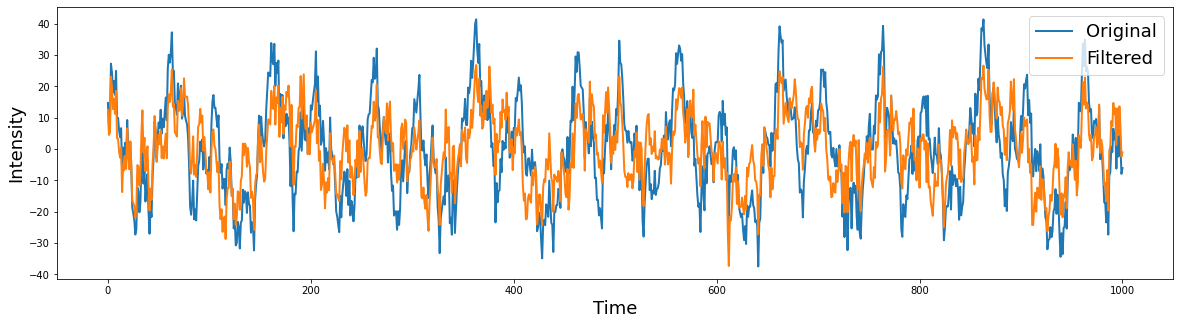

In [149]:
filter_order = 2 
lowcut = 8
highcut = 12

# Create the filter
b,a = butter(filter_order, [lowcut, highcut], btype='bandstop', output='ba', fs=sampling_frequency)

# Plot the filter
plot_filter(b, a, sampling_frequency)

# Apply the filter
filtered = filtfilt(b, a, signal)

plt.figure(figsize=(20,5))
plt.plot(signal, linewidth=2)
plt.plot(filtered, linewidth=2)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.legend(['Original','Filtered'], fontsize=18)

# Exercises

## Exercise 1. Create a simulated time series with 7 different frequencies with noise

## Exercise 2. Show that you can identify each signal using a FFT

## Exercise 3. Remove one frequency with a bandstop filter

## Excercise 4. Reconstruct the signal with the frequency removed and compare it to the original